Image Data Analysis with RNN (Recurrent Neural Networks)
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6047 - loss: 1.2384
Epoch 1: accuracy improved from -inf to 0.75552, saving model to mnist_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6054 - loss: 1.2366 - val_accuracy: 0.8877 - val_loss: 0.3982
Epoch 2/10
464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8857 - loss: 0.3939
Epoch 2: accuracy improved from 0.75552 to 0.89637, saving model to mnist_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8858 - loss: 0.3935 - val_accuracy: 0.9222 - val_loss: 0.2824
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9130 - loss: 0.2976
Epoch 3: accuracy improved from 0.89637 to 0.92073, saving model to mnist_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9130 - loss: 0.2975 - val_accuracy: 0.9214 - val_loss: 0.2704
Epoch 4/10
464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9300 - loss: 0.2422
Epoch 4: accuracy improved from 0.92073 to 0.

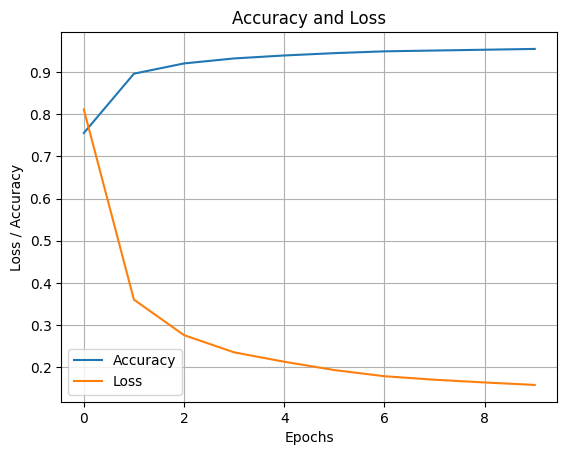

In [2]:

from keras import Sequential
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
from keras.layers import Dense, SimpleRNN, LSTM, GRU, Activation

print("Image Data Analysis with RNN (Recurrent Neural Networks)")

(xtrain, ytrain), (xtest,ytest) = mnist.load_data()

xtrain1 = xtrain
xtest1 = xtest

xtrain = xtrain/255.0
xtest = xtest/255.0
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

model = Sequential()
model.add(SimpleRNN(50, input_shape=(28,28)))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint=ModelCheckpoint('mnist_model.keras', verbose=1, monitor='accuracy', save_best_only=True)
history = model.fit(xtrain, ytrain, batch_size=128, epochs=10, verbose=1, validation_data=(xtest, ytest), callbacks=[checkpoint] )

#Evaluation Metrics
scores = model.evaluate(xtest, ytest)
print("Loss")
print(scores[0])
print("Accuracy")
print(scores[1])

# graph
his = pd.DataFrame(history.history)
fig1 = plt.figure()
plt.plot(his['accuracy'], label="Accuracy")
plt.plot(his['loss'], label="Loss")
plt.legend()
plt.title("Accuracy and Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.grid()
plt.show(fig1)

Enter a image sample id (0-9999):3


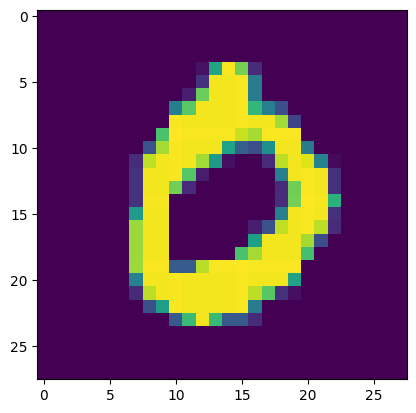

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
[[9.99135196e-01 6.31695912e-07 2.86545284e-04 1.28601705e-05
  7.89984188e-06 1.92392632e-04 3.21424566e-04 1.53767469e-05
  1.89140446e-05 8.80222524e-06]]

The number is given below : 
[0]


In [3]:
# PREDICTION
from keras.models import load_model

# load model
model_pred_rnn = load_model("mnist_model.keras")
#load data
(xtrain, ytrain), (xtest,ytest) = mnist.load_data()

n1 = int(input("Enter a image sample id (0-9999):"))

# display the image from the mnnist database below
fig1=plt.figure()
plt.imshow(xtest1[n1])
plt.show(fig1)

# Input
sample = xtest[n1].reshape((1, 28, 28)) / 255.0

target_sp = model_pred_rnn.predict(sample)
print(target_sp)
out = np.argmax(target_sp, axis=1)
print("\r\nThe number is given below : ")
print(out)